In [429]:
import pandas as pd

# Load the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Specify the name of the columns
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']

# Features
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

# Get the features
X = df[features].values

# Get the target
y = df['Class'].values

In [430]:
from sklearn.preprocessing import LabelEncoder

# The label encoder for the target
le = LabelEncoder()

# Encode the target
y = le.fit_transform(y)

In [431]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
scaler = StandardScaler()

# Standardize the features
X = scaler.fit_transform(X)

In [432]:
from sklearn.ensemble import RandomForestClassifier

# Declare the classifier
rfc = RandomForestClassifier(random_state=0)

# Train the classifier
rfc.fit(X, y)

# Get the feature importances
importances = rfc.feature_importances_

Petal width     0.489820
Petal length    0.368047
Sepal length    0.118965
Sepal width     0.023167
dtype: float64


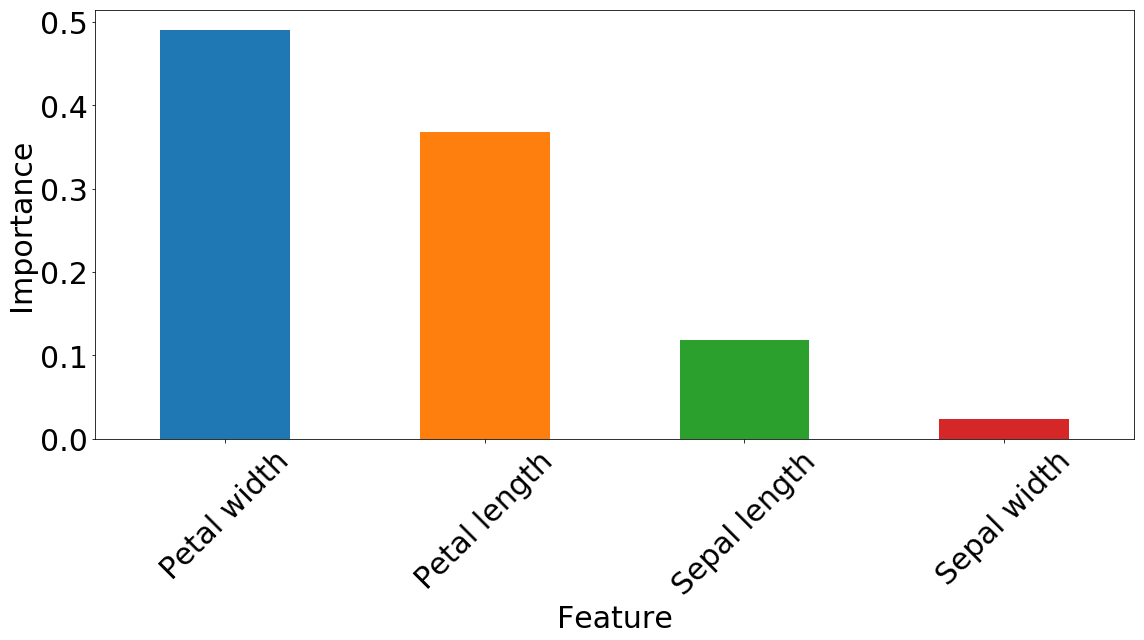

In [433]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, features)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

print(f_importances)

# Make the bar plot from f_importances 
f_importances.plot(kind='bar', figsize=(16,9), rot=45, fontsize=30)

plt.xlabel('Feature', fontsize=30)
plt.ylabel('Importance', fontsize=30)

# Show the bar plot of feature importance
plt.tight_layout()
plt.savefig('iris_rf.pdf', dpi=300)
plt.show()

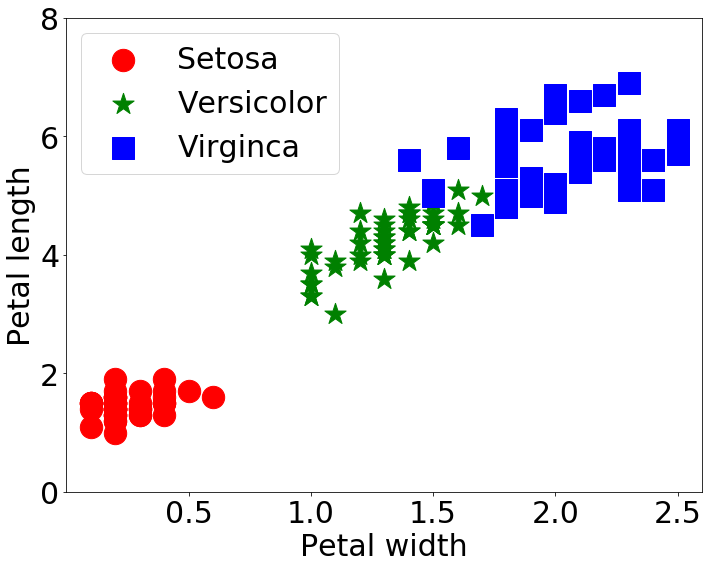

In [434]:
# Get the x values
X = scaler.inverse_transform(X)
x_col = features.index('Petal width')
x_vals = X[:, x_col]

# Get the y values
y_col = features.index('Petal length')
y_vals = X[:, y_col]

# Get the color, marker, and label
colors = ["red", "green", "blue"]
markers = ["o", "*", "s"]
labels = ["Setosa", "Versicolor", "Virginca"]

# Get the data
data = {}
for num in range(3):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]

# Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
 
for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    x, y = data[num]
    ax.scatter(x, y, c=color, marker=marker, s=500, label=label)
    
plt.xlabel('Petal width', fontsize=30)
plt.ylabel('Petal length', fontsize=30)
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5], fontsize=30)
plt.yticks([0, 2, 4, 6, 8], fontsize=30)
plt.xlim(0, 2.6)
plt.ylim(0, 8)
plt.legend(loc=2, fontsize=30)
plt.tight_layout()
plt.savefig('iris.pdf', dpi=300)
plt.show()